In [1]:
# Import packages
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Split the data for train and test
df = pd.read_csv('Usecase1_Dataset.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train_data = df[msk]
test_data = df[~msk]

In [4]:
# Descibe data
train_data.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract,split
count,8166.000000,8.166000e+03,8.084000e+03,8166.000000,8166.000000,8166.000000,8.166000e+03,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,8166.000000
mean,7209.152217,3.624910e+06,1.738456e+05,1948.546657,1.301861,98.813373,1.655942e+05,40.754780,-73.956821,7.152260,15.855778,4891.153625,0.003809
std,4312.895190,1.043610e+06,3.646377e+05,30.662646,4.493186,7.512811,3.223449e+05,0.080436,0.046686,3.973122,15.673823,13481.191295,0.998313
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000,-3.838019
25%,3448.250000,2.743098e+06,6.492275e+04,1927.000000,1.000000,100.000000,6.646300e+04,40.706846,-73.984632,4.000000,4.000000,99.000000,-0.655041
50%,7073.500000,3.129409e+06,9.180000e+04,1941.000000,1.000000,100.000000,9.240000e+04,40.759255,-73.962734,7.000000,9.000000,201.000000,0.007974
75%,11060.500000,4.408471e+06,1.585400e+05,1965.000000,1.000000,100.000000,1.566492e+05,40.819466,-73.930333,9.000000,33.000000,519.000000,0.672339
max,14993.000000,5.991312e+06,1.354011e+07,2016.000000,161.000000,100.000000,1.421712e+07,40.912828,-73.715543,56.000000,51.000000,155101.000000,3.659505


In [5]:
# Preview data
train_data.head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,split
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...,1.268806
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...,0.799725


In [6]:
# Preview data
test_data.head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,split
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...,0.139350
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...,-1.142473


In [8]:
# Check the number of registers and features
print("Train shape with Id : {} ".format(train_data.shape))
print("Test shape with Id : {} ".format(test_data.shape))

#id_name='OrderId'

#Save the 'Id' column
train_ID = train_data['Order']  # fel! behöver fixas
test_ID = test_data['Order']  # fel! behöver fixas
test_ID2 = test_data['Property Id'] # rätt 

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop('Order', axis = 1, inplace = True)
test_data.drop('Order', axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nTrain shape without Id : {} ".format(train_data.shape)) 
print("Test shape without Id : {} ".format(test_data.shape))

Train shape with Id : (8166, 61) 
Test shape with Id : (3580, 61) 

Train shape without Id : (8166, 60) 
Test shape without Id : (3580, 60) 


In [9]:
target = 'ENERGY STAR Score'
source = 'Source'

y_train = train_data[target]
features = train_data.columns.tolist()
features.remove(target)

train_data[source] = 'Train'
test_data[source] = 'Test'

df = pd.concat((train_data, test_data)).reset_index(drop=True)
#df.drop([target], axis=1, inplace=True)

train_data.drop([source], axis = 1, inplace = True)
test_data.drop([source], axis = 1, inplace = True)

print("Total dataframe size is : {}".format(df.shape))

#X = df[features]

X_train = train_data[features]
y_train = train_data[target]
X = train_data
y = y_train

Total dataframe size is : (11746, 61)


In [10]:
# Preview data
df.head(2)

,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,...,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,split,Source
0,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,...,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...,1.268806,Train
1,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,...,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...,0.799725,Train


In [11]:
# Obtaining general info about the dataset
df.dtypes

Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area                                          float64
Primary Property Typ

In [12]:
# Obtain an overview of the variables
import pandas_profiling as pf
pf.ProfileReport(df)

ModuleNotFoundError: No module named 'pandas_profiling'

# Missing Analysis

In [10]:
df_nan = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing n':df.isnull().sum(),'% Missing' :df_nan})
missing_data.sort_values('% Missing', ascending=False).head(15)

,Missing n,% Missing
ENERGY STAR Score,2839,30.007399
NTA,1799,19.014903
Census Tract,1799,19.014903
Longitude,1799,19.014903
Latitude,1799,19.014903
Council District,1799,19.014903
Community Board,1799,19.014903
Water Required?,78,0.824437
Street Number,53,0.560194
Street Name,51,0.539055


The number of missing values should be higher. When we look at the data type, some columns that are supposed to be numeric have been classified as object, as they also contain strings. A quick inspection shows that the dataset contains the information 'Not Available', which have caused them to be identofied as strings. So we will correct the data and review the missing information.

In [11]:
df.replace('Not Available',np.nan,inplace=True)

In [12]:
df_nan = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing n':df.isnull().sum(),'% Missing' :df_nan})
missing_data.sort_values('% Missing', ascending=False).head(45)

,Missing n,% Missing
Fuel Oil #1 Use (kBtu),9453,99.915442
Diesel #2 Use (kBtu),9452,99.904873
Address 2,9311,98.414544
Fuel Oil #5 & 6 Use (kBtu),9036,95.507874
District Steam Use (kBtu),8746,92.442659
3rd Largest Property Use Type,8702,91.977592
3rd Largest Property Use Type - Gross Floor Area (ft²),8702,91.977592
Fuel Oil #4 Use (kBtu),8375,88.521298
Fuel Oil #2 Use (kBtu),7341,77.592221
2nd Largest Property Use - Gross Floor Area (ft²),7128,75.340873


Now that the strings have been removed from the numeric columns, we can set their type as numeric and further analyze it

In [13]:
numeric_terms=['ft²','kBtu','(therms)','(kWh)','(Metric Tons CO2e)','(kgal)']

for col in list(df.columns):
    for term in numeric_terms:
        if (term in col):
            df[col] = df[col].astype(float)

In [14]:
# Descriptive statistics
df.describe()

,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Census Tract,Community Board,Council District,DOF Gross Floor Area,Diesel #2 Use (kBtu),Direct GHG Emissions (Metric Tons CO2e),District Steam Use (kBtu),ENERGY STAR Score,Electricity Use - Grid Purchase (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Indirect GHG Emissions (Metric Tons CO2e),Largest Property Use Type - Gross Floor Area (ft²),Latitude,Longitude,Natural Gas Use (kBtu),Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Property Id,Site EUI (kBtu/ft²),Source EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Water Intensity (All Water Sources) (gal/ft²),Water Use (All Water Sources) (kgal),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity (kWh),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Source EUI (kBtu/ft²),Year Built
count,2333.000000,759.000000,7662.000000,7662.000000,7662.000000,9.413000e+03,9.000000,9448.000000,7.150000e+02,6622.000000,9.387000e+03,8.000000e+00,2.120000e+03,1.086000e+03,4.250000e+02,9452.000000,9.461000e+03,7662.000000,7662.000000,8.479000e+03,9461.000000,9461.000000,9.461000e+03,9.461000e+03,9461.000000,9461.000000,9458.000000,6427.000000,6.427000e+03,8395.000000,8.986000e+03,8986.000000,8080.000000,8.080000e+03,8395.000000,9461.000000
mean,21722.826875,12503.410672,5174.182328,7.326938,16.486165,1.628247e+05,141241.922222,405.935891,1.730631e+07,60.477348,4.756035e+06,3.611874e+06,3.031350e+06,5.306366e+06,2.957494e+06,527.458633,1.563807e+05,40.753859,-73.955825,6.225565e+06,1.283797,99.034457,1.612880e+05,3.651571e+06,79.989504,133.680298,932.615638,103.153079,1.356884e+04,83.889744,1.400621e+06,6.958936,0.475804,6.619112e+04,138.036557,1948.404820
std,47416.969048,18259.226660,13464.393080,4.002023,15.912402,2.982935e+05,156870.656763,963.319271,2.561426e+07,29.440291,1.178373e+07,2.261899e+06,5.181741e+06,5.819176e+06,4.873893e+06,1520.810652,2.835988e+05,0.082606,0.045437,1.737057e+07,3.986142,5.576726,2.913700e+05,1.046169e+06,31.955406,59.506368,1852.336089,661.679530,1.064240e+05,33.207588,3.487793e+06,5.264301,0.352285,1.777963e+05,60.059277,29.988373
min,0.000000,0.000000,1.000000,1.000000,1.000000,5.002800e+04,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.800000e+03,40.521360,-74.229887,0.000000e+00,0.000000,0.000000,1.200000e+02,7.365000e+03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1600.000000
25%,5280.000000,3100.000000,104.000000,5.000000,4.000000,6.500000e+04,0.000000,169.100000,4.354622e+06,38.000000,1.015368e+06,2.007400e+06,2.629659e+05,2.278750e+06,0.000000e+00,93.475000,6.582100e+04,40.700605,-73.983741,1.193594e+06,1.000000,100.000000,6.692400e+04,2.771494e+06,62.600000,99.500000,332.625000,29.270000,2.803850e+03,66.000000,2.935480e+05,3.800000,0.100000,1.268538e+04,103.600000,1927.000000
50%,9638.000000,7683.000000,219.000000,7.000000,10.000000,9.100000e+04,69000.000000,279.100000,9.384840e+06,66.000000,1.745232e+06,4.555486e+06,1.283400e+06,4.369343e+06,2.850000e+05,162.400000,9.049200e+04,40.758860,-73.962267,4.171514e+06,1.000000,100.000000,9.240600e+04,3.315314e+06,78.400000,123.200000,493.500000,47.020000,4.849000e+03,82.400000,5.089222e+05,5.100000,0.500000,4.495160e+04,127.900000,1940.000000
75%,20000.000000,14254.500000,550.000000,10.000000,33.000000,1.535880e+05,276662.400000,441.525000,1.921388e+07,86.000000,3.993107e+06,5.032566e+06,4.367427e+06,6.510396e+06,4.874294e+06,384.100000,1.500000e+05,40.823152,-73.929042,6.723020e+06,1.000000,100.000000,1.534140e+05,4.409224e+06,95.800000,156.900000,852.250000,72.545000,8.001900e+03,101.000000,1.161282e+06,8.500000,0.700000

By quickly looking at the presented data, plus information about the fields, we conclude that:

1) 'NYC Borough, Block and Lot (BBL) self-reported' is equal to 'BBL - 10 digits', where the first digit represents the 'Borough', next five digits 'Tax Block' and last four 'Tax Lot', plus we have already a 'Borough' column in the dataset. -- Since there are only two missing values at 'BBL - 10 digits', but more on the others, I'll check if I can use it to fill in the missing information. This was helpful: https://a836-pts-access.nyc.gov/care/forms/htmlframe.aspx?mode=content/home.htm

2) 'Address 1 (self-reported)', 'Address 2', 'Postal Code','Street Name', 'Street Number','Latitude' and 'Longitude' contain information about the localization. I'll keep only 'Postal Code' as it seems to be the most generic information about it, besides 'Borough'. There may be additional or more general information about the location at 'Census Tract', 'Community Board', 'Council District', but for now I'll ignore these as these columns haven't even been described at the documetation file. -- This might be helpful: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm

3) 'Total GHG Emissions (Metric Tons CO2e)'='Direct GHG Emissions (Metric Tons CO2e)'+'Indirect GHG Emissions (Metric Tons CO2e)' --- I'll keep the total and the fraction of direct

4) 'Property GFA - Self-Reported (ft²)'='DOF Gross Floor Area', so I'll drop the 'DOF Gross Floor Area' that has missing values

5) 'Largest Property Use Type - Gross Floor Area (ft²)','2nd Largest Property Use - Gross Floor Area (ft²)' and
'3rd Largest Property Use Type - Gross Floor Area (ft²)' are part of 'Property GFA - Self-Reported (ft²)'--
I'll create and keep the fractions they represent and drop the original values

5) 'Site EUI (kBtu/ft²)'=('Fuel Oil #1 Use (kBtu)'+'Fuel Oil #2 Use (kBtu)'+'Fuel Oil #4 Use (kBtu)'+
                        'Fuel Oil #5 & 6 Use (kBtu)'+'Diesel #2 Use (kBtu)'+'Natural Gas Use (kBtu)'+
                        'District Steam Use (kBtu)'+'Electricity Use - Grid Purchase (kBtu)')/ GFA


In [15]:
#df.loc[df['BBL - 10 digits'].isnull()]
#Shows that id 6656 and 6690 are the ones that have no info on Borough
#df.iloc[6656,:] # 'BBL - 10 digits' was NAN. Used Address to locate BBL online ()
#df.iloc[6690,:] # 'BBL - 10 digits' was NAN. Used Address to locate BBL online ()
#df.iloc[8270,:] #  Has same Postal Code as 6690 but divergent information when looking at website databases. 
                 # 'BBL - 10 digits' and Postal Code.

In [16]:
df.ix[6656,'BBL - 10 digits'] ='2036420001'
df.ix[6690,'BBL - 10 digits'] = '3067130006'
df.ix[8270,'BBL - 10 digits'] = '3044240012'
df.ix[8270,'Postal Code'] = '10467'

In [17]:
df['Largest Property Use Rate'] = df['Largest Property Use Type - Gross Floor Area (ft²)']/df['Property GFA - Self-Reported (ft²)']
df['2nd Property Use Rate'] = df['2nd Largest Property Use - Gross Floor Area (ft²)']/df['Property GFA - Self-Reported (ft²)']
df['3rd Property Use Rate'] = df['3rd Largest Property Use Type - Gross Floor Area (ft²)']/df['Property GFA - Self-Reported (ft²)']
df['Direct GHG Emissions Rate'] = df['Direct GHG Emissions (Metric Tons CO2e)']/df['Total GHG Emissions (Metric Tons CO2e)']
df['BBL - 10 digits'] = df['BBL - 10 digits'].str.extract('(\d+)', expand=False)
df['Borough'] = df['BBL - 10 digits'].str[0]
df['Tax Block'] = df['BBL - 10 digits'].str[1:6]
df['Tax Lot'] = df['BBL - 10 digits'].str[6:10]
df['Postal Code'] = df['Postal Code'].astype(str)
df['Year Built'] = df['Year Built'].astype(str)
df['Borough'] = df['Borough'].astype(str)
df['Tax Block'] = df['Tax Block'].astype(str)
df['Tax Lot'] = df['Tax Lot'].astype(str)
df['Property Id'] = df['Property Id'].astype(str)

In [18]:
df_nan = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing n':df.isnull().sum(),'% Missing' :df_nan})
missing_data.sort_values('% Missing', ascending=False).head(45)

,Missing n,% Missing
Fuel Oil #1 Use (kBtu),9453,99.915442
Diesel #2 Use (kBtu),9452,99.904873
Address 2,9311,98.414544
Fuel Oil #5 & 6 Use (kBtu),9036,95.507874
District Steam Use (kBtu),8746,92.442659
3rd Largest Property Use Type,8702,91.977592
3rd Largest Property Use Type - Gross Floor Area (ft²),8702,91.977592
3rd Property Use Rate,8702,91.977592
Fuel Oil #4 Use (kBtu),8375,88.521298
Fuel Oil #2 Use (kBtu),7341,77.592221


We still have a lot of missing values. Here we will convert some missing values into zero because they are actually zero, transform missing values at 2nd and 3rd Property Use Type to 'none' and then drop some of the columns that I believe are irrelevant for the analysis.

In [19]:
zero_col = ['2nd Property Use Rate','3rd Property Use Rate',
            'Water Intensity (All Water Sources) (gal/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)',
            'Total GHG Emissions (Metric Tons CO2e)','Weather Normalized Site Electricity Intensity (kWh/ft²)',
            'Direct GHG Emissions Rate','Total GHG Emissions (Metric Tons CO2e)'
            ]

for col in zero_col:
    df[col].replace(np.nan, 0, inplace = True)

In [20]:
prop_col = ['2nd Largest Property Use Type','3rd Largest Property Use Type']

for col in prop_col:
    df[col].replace(np.nan, 'none', inplace = True)

In [21]:
drop_items = ['NYC Borough, Block and Lot (BBL) self-reported',
            'NYC Building Identification Number (BIN)',
            'BBL - 10 digits',
            'Parent Property Name',
            'Property Name',
            'Address 1 (self-reported)',
            'Address 2',
            'Street Number',
            'Street Name',
            'Latitude',
            'Longitude',
            'DOF Gross Floor Area',
            'DOF Benchmarking Submission Status',
            'List of All Property Use Types at Property',
            'Largest Property Use Type - Gross Floor Area (ft²)',
            '2nd Largest Property Use - Gross Floor Area (ft²)',
            '3rd Largest Property Use Type - Gross Floor Area (ft²)',                     
            'Fuel Oil #1 Use (kBtu)',                                         
            'Fuel Oil #2 Use (kBtu)',                                         
            'Fuel Oil #4 Use (kBtu)',                                         
            'Fuel Oil #5 & 6 Use (kBtu)',                                     
            'Diesel #2 Use (kBtu)',                                           
            'District Steam Use (kBtu)',                                      
            'Natural Gas Use (kBtu)',                                         
            'Weather Normalized Site Natural Gas Use (therms)',               
            'Electricity Use - Grid Purchase (kBtu)',                         
            'Weather Normalized Site Electricity (kWh)',                      
            'Direct GHG Emissions (Metric Tons CO2e)',                        
            'Indirect GHG Emissions (Metric Tons CO2e)',                      
            'Property GFA - Self-Reported (ft²)',                              
            'Water Use (All Water Sources) (kgal)', 
            'Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Source EUI (kBtu/ft²)'
           ]

df.drop(drop_items, axis = 1, inplace = True)

# Correlation

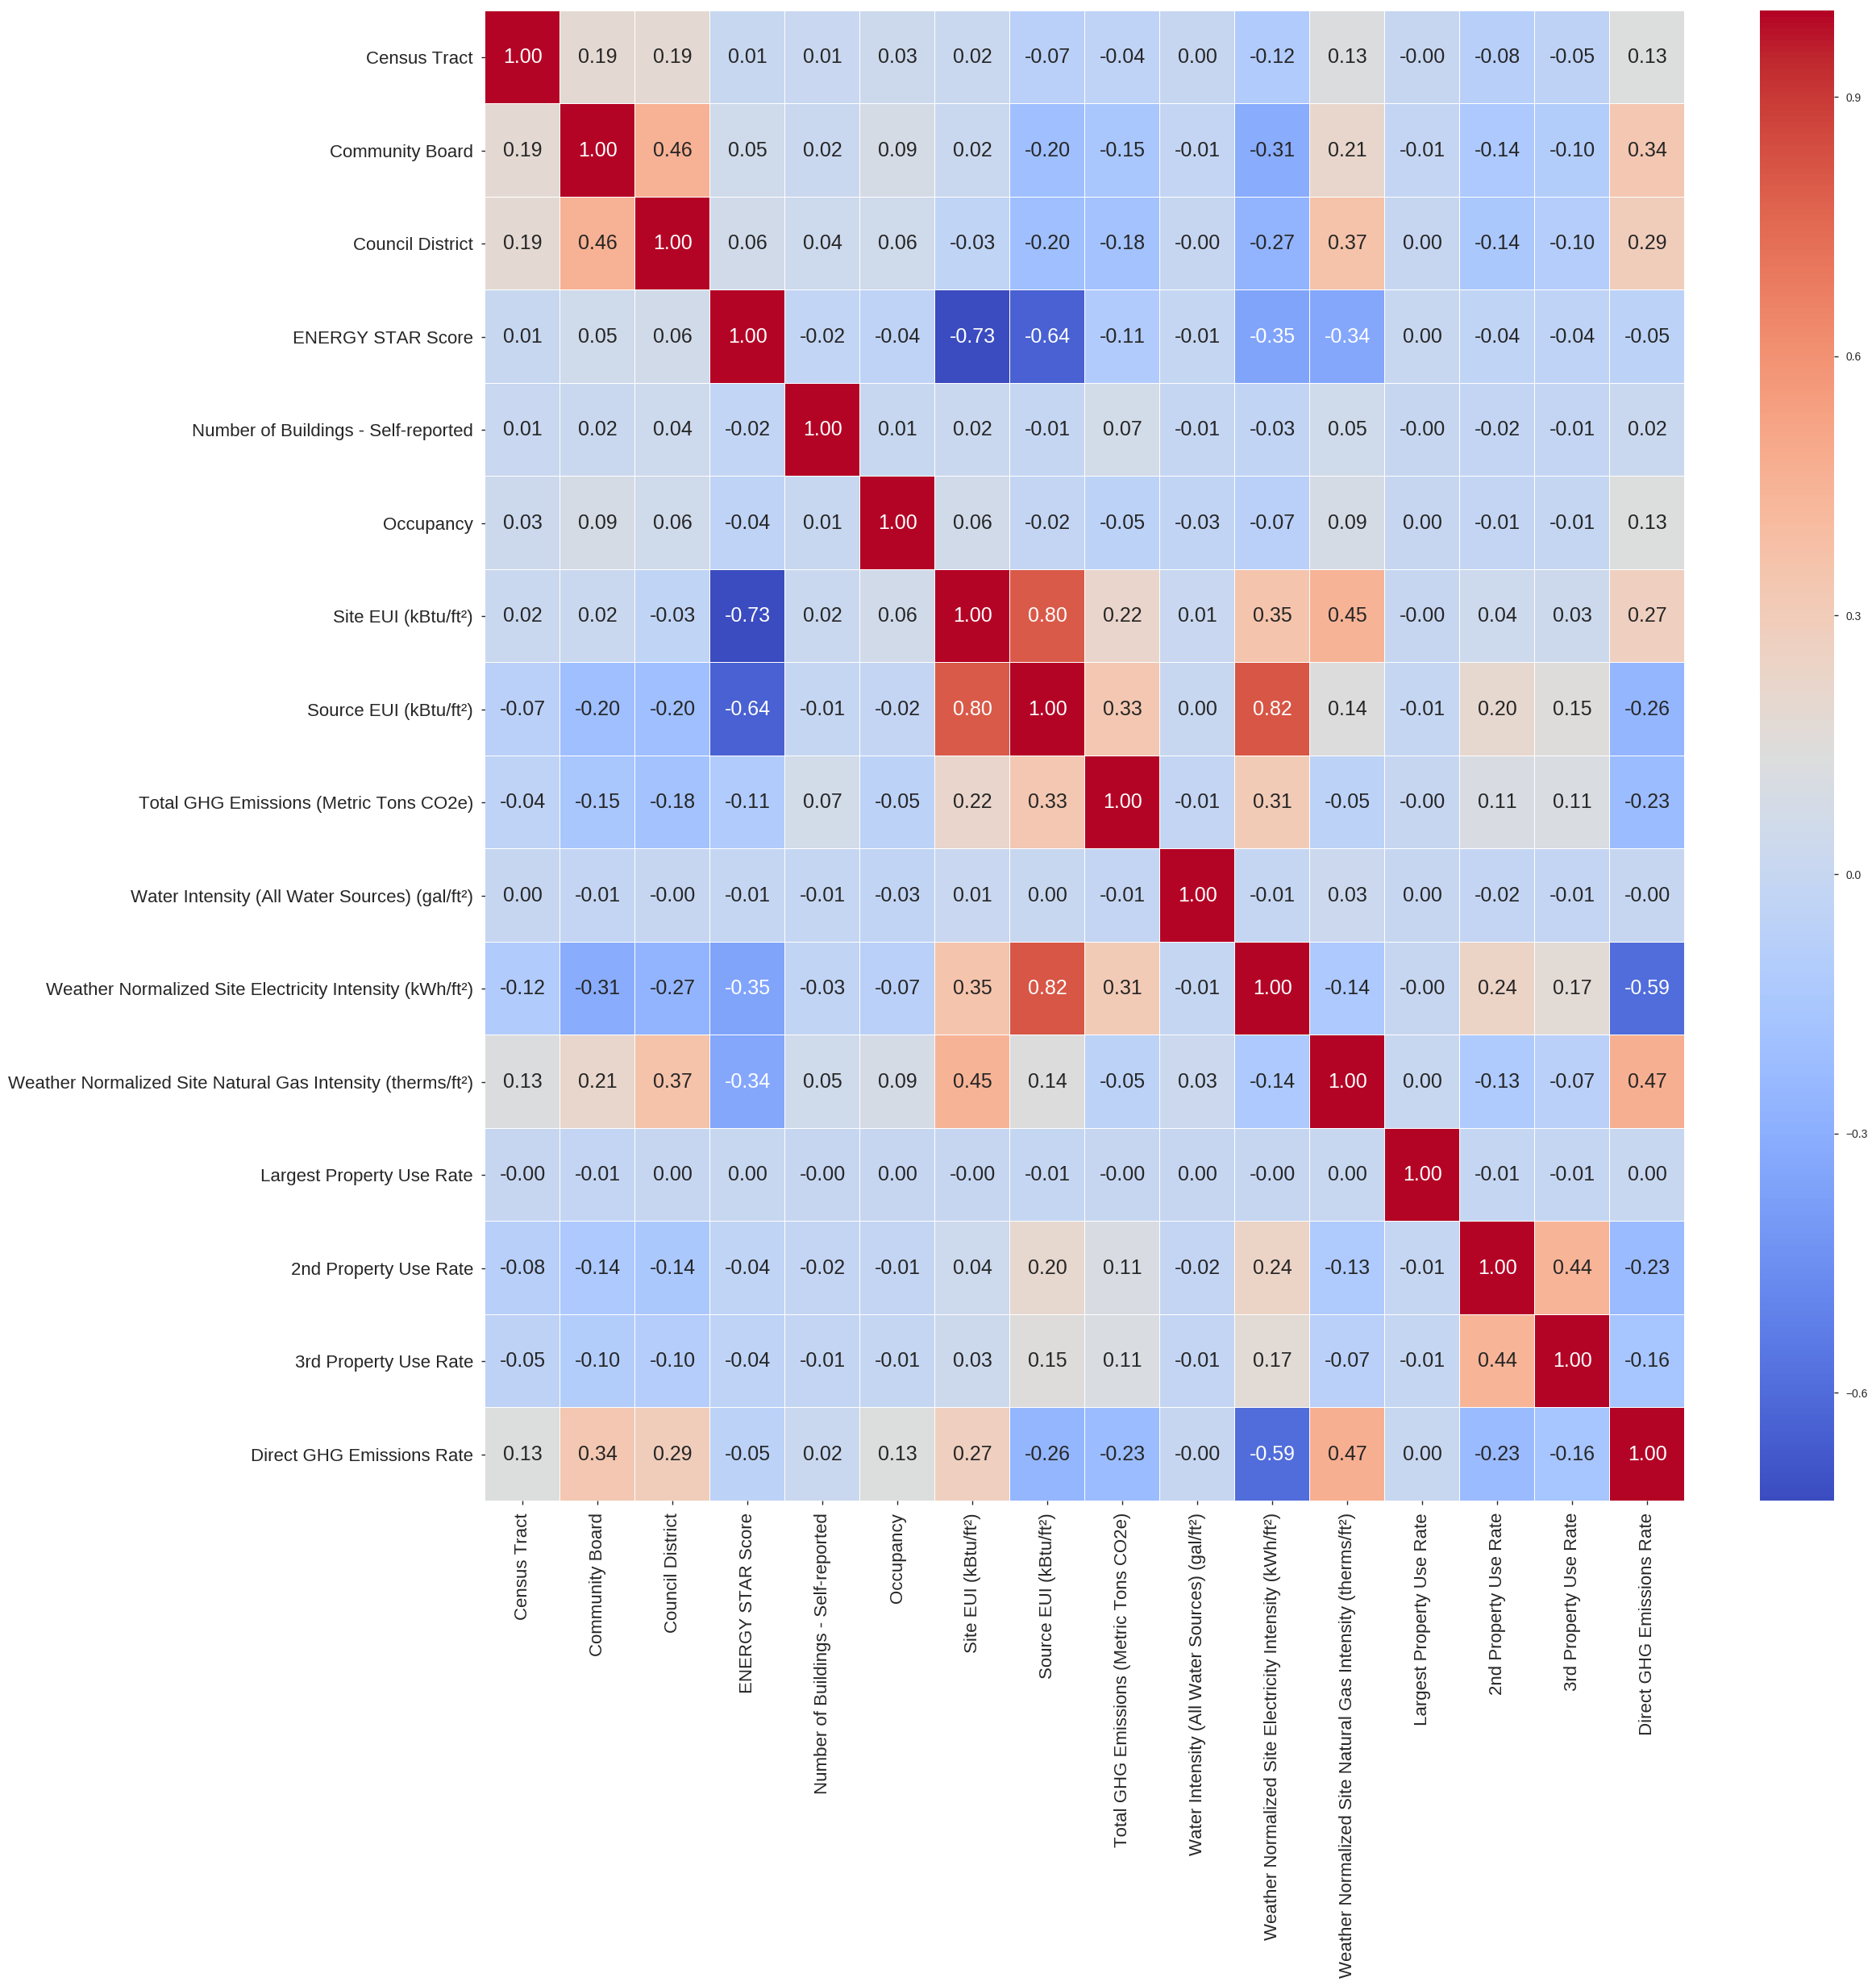

In [22]:
# Calculates the correlation and plot the data in s heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.1, annot_kws = {'size':18}, fmt = '.2f')
fig = plt.gcf()
fig.set_size_inches(24,24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

The Property Type colums has a lot of values, some that appears more often and others less. I have put them all together, and split into categories that I believed made a bit  of sense, while also looking at their frequency.

In [23]:
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
            'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
            'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [24]:
df['Largest Property Use Type'] = df['Largest Property Use Type'].map(property_type).astype(str)
df['2nd Largest Property Use Type'] = df['2nd Largest Property Use Type'].map(property_type).astype(str)
df['3rd Largest Property Use Type'] = df['3rd Largest Property Use Type'].map(property_type).astype(str)

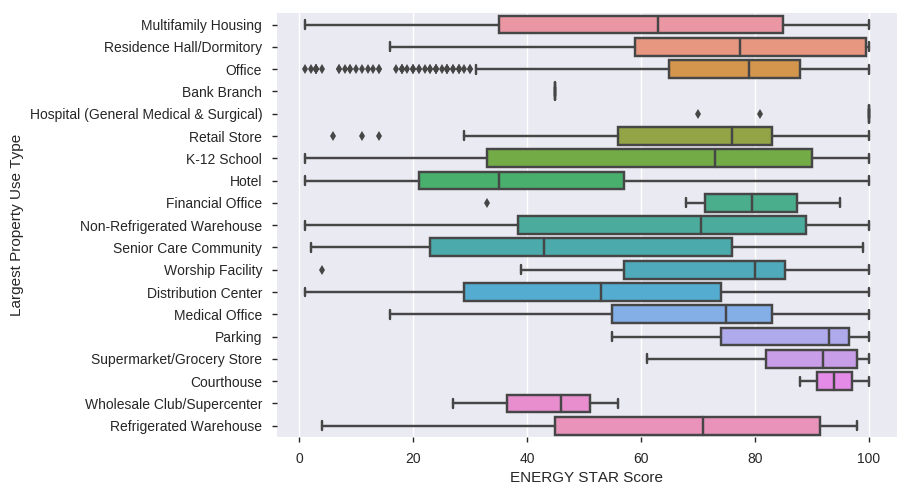

In [25]:
sns.boxplot(train_data['ENERGY STAR Score'],train_data['Largest Property Use Type'])

In [26]:
new_droplist = ['Metered Areas (Energy)','Metered Areas  (Water)','Release Date','Water Required?','Community Board','Council District','Census Tract','NTA']

df.drop(new_droplist, axis = 1, inplace = True)

In [27]:
# Select the numeric columns
df_numeric_col = df.select_dtypes('number')
df_numeric_feat_col = df_numeric_col.drop('ENERGY STAR Score', axis = 1)
ycol = df['ENERGY STAR Score']

df_feat_col = df.select_dtypes('object')
df_feat_col2 = df_feat_col.drop(['Borough', 'Largest Property Use Type'], axis = 1)

# Select the categorical columns
df_cat_col = df[['Borough', 'Largest Property Use Type']]

# One hot encode
df_cat_col = pd.get_dummies(df_cat_col)

# Join the two dataframes using concat
df_v1_full = pd.concat([ycol, df_feat_col2, df_numeric_feat_col, df_cat_col], axis = 1)

In [28]:
df_v1_full.dtypes

ENERGY STAR Score                                             float64
2nd Largest Property Use Type                                  object
3rd Largest Property Use Type                                  object
Parent Property Id                                             object
Postal Code                                                    object
Primary Property Type - Self Selected                          object
Property Id                                                    object
Source                                                         object
Year Built                                                     object
Tax Block                                                      object
Tax Lot                                                        object
Number of Buildings - Self-reported                             int64
Occupancy                                                       int64
Site EUI (kBtu/ft²)                                           float64
Source EUI (kBtu/ft²

In [29]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

le = LabelEncoder()
df_v1_full['n_Postal Code'] = le.fit_transform(df_v1_full['Postal Code'])
df_v1_full['n_Parent Property Id'] = le.fit_transform(df_v1_full['Parent Property Id'])
df_v1_full['n_Property Id'] = le.fit_transform(df_v1_full['Property Id'])
df_v1_full['n_Tax Lot'] = le.fit_transform(df_v1_full['Tax Lot'])
df_v1_full['n_Tax Block'] = le.fit_transform(df_v1_full['Tax Block'])
df_v1_full['n_3rd Largest Property Use Type'] = le.fit_transform(df_v1_full['3rd Largest Property Use Type'])
df_v1_full['n_2nd Largest Property Use Type'] = le.fit_transform(df_v1_full['2nd Largest Property Use Type'])
df_v1_full['n_Primary Property Type - Self Selected'] = le.fit_transform(df_v1_full['Primary Property Type - Self Selected'])

#oe = OrdinalEncoder() -- discretize!!
df_v1_full['n_Year Built'] = le.fit_transform(df_v1_full['Year Built'])

In [30]:
selection = ['Postal Code','Parent Property Id','Property Id','Tax Lot','Tax Block',
        '3rd Largest Property Use Type','2nd Largest Property Use Type',
        'Primary Property Type - Self Selected','Year Built']

df_v1_full = df_v1_full.drop(selection, axis = 1)

In [31]:
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer

df_v2 = df_v1_full.copy()

y_val = df_v2.copy()

select = ['ENERGY STAR Score',
        'Number of Buildings - Self-reported','Occupancy',
        'Site EUI (kBtu/ft²)','Source EUI (kBtu/ft²)','Total GHG Emissions (Metric Tons CO2e)',
        'Water Intensity (All Water Sources) (gal/ft²)','Weather Normalized Site Electricity Intensity (kWh/ft²)',
        'Weather Normalized Site Natural Gas Intensity (therms/ft²)','Largest Property Use Rate',
        '2nd Property Use Rate','3rd Property Use Rate','Direct GHG Emissions Rate'
        ]

df_v2_part = df_v2[select]

scaler = StandardScaler()
normal = Normalizer()
log1p = FunctionTransformer(np.log1p),
qtnormal = QuantileTransformer(output_distribution='normal')
jtrans =PowerTransformer(method='yeo-johnson')
#boxcox = PowerTransformer(method='box-cox')

df_v2_part_normalized = pd.DataFrame(scaler.fit_transform(df_v2_part))
df_v2_part_transformed = pd.DataFrame(jtrans.fit_transform(df_v2_part_normalized))
df_v2_part_transformed.columns = select
df_v2[select] = df_v2_part_transformed

#df_v2_full = df_v1_full
selection=['Source EUI (kBtu/ft²)','n_Year Built','n_Parent Property Id','n_Property Id','n_Tax Lot',
            'n_Tax Block','n_3rd Largest Property Use Type','n_2nd Largest Property Use Type',
            'n_Primary Property Type - Self Selected','n_Year Built','Number of Buildings - Self-reported',
            'Occupancy'
          ]

#df_v1=df_v1_full.drop(selection,axis=1)
df_v2=df_v2.drop(selection,axis=1)

In [32]:
df_test_y = y_val.loc[y_val['Source'] == 'Train']
df_test_y.drop('Source', axis = 1, inplace = True)
y_val_fin = df_test_y['ENERGY STAR Score']

In [33]:
df_base = df_v2 ### <-
df_train = df_base.loc[df_base['Source'] == 'Train']
df_test = df_base.loc[df_base['Source'] == 'Test']
df_train.drop('Source', axis = 1, inplace = True)
df_test.drop('Source', axis = 1, inplace = True)

# Outliers

Pending

In [34]:
y = df_train['ENERGY STAR Score']
X = df_train.drop('ENERGY STAR Score', axis=1)

X_TEST = df_test.drop('ENERGY STAR Score', axis=1)

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y_val_fin, test_size = 0.3, random_state = 100)
y_not_norm = y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#X_test=X_TEST #  <---  

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

#gradient_boosted = GradientBoostingRegressor() #  <---  
gradient_boosted=GradientBoostingRegressor(loss='lad', max_depth=5, #  <---  
                          max_features=None,
                          min_samples_leaf=6,
                          min_samples_split=6,
                          n_estimators=500)

gradient_boosted.fit(X_train, y_train)
predictions = gradient_boosted.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)
#Gradient Boosted Performance on the test set: MAE = 8.3002 df_v1_full
#Gradient Boosted Performance on the test set: MAE = 9.6863 df_v2_full
#Gradient Boosted Performance on the test set: MAE = 9.9390 df_V2_red
#Gradient Boosted Performance on the test set: MAE = 0.2812 df_v2_full  jtrans + scaler

Gradient Boosted Performance on the test set: MAE = 0.2804


In [37]:
#gradient_boosted=GradientBoostingRegressor(loss='lad', max_depth=5,
#                          max_features=None,
#                          min_samples_leaf=6,
#                          min_samples_split=6,
#                          n_estimators=500)

#gradient_boosted.fit(X_train, y_train)

#predictions = gradient_boosted.predict(X_TEST)

In [38]:
#X_TEST['ENERGY STAR Score'] = predictions  #  <---  
#new_x = X_TEST[select]                     #  <---  

X_test['ENERGY STAR Score'] = predictions #  <---  
new_x = X_test[select]                    #  <---  

new_transformed = pd.DataFrame(jtrans.inverse_transform(new_x))
new2 = pd.DataFrame(scaler.inverse_transform(new_transformed))
predictions2 = new2[0]
predictions3 = [0 if item < 0 else 100 if item > 100 else round(item,0) for item in predictions2]
#predictions2 = [0 if item < 0 else 100 if item > 100 else round(item,0) for item in predictions]

result = predictions3

In [39]:
mae_1 = mean_absolute_error(y_test, predictions)
mae_2 = mean_absolute_error(y_not_norm, result)
print('Gradient Boosted Performance with output transformed and normalized on the test set: MAE = %0.4f' % mae_1)
print('Gradient Boosted Performance with output converted back to original format on the test set: MAE = %0.4f' % mae_2)

Gradient Boosted Performance with output transformed and normalized on the test set: MAE = 0.2804
Gradient Boosted Performance with output converted back to original format on the test set: MAE = 8.2637


In [40]:
#sub_file = []
#sub_file = pd.DataFrame(test_ID2)
#sub_file['score'] = result
#sub_file.to_csv('submission_v2.csv', index=False)